<a href="https://colab.research.google.com/github/utkarsh0702/Pytorch/blob/master/PyTorch2_MNIST_Handwritten_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transform= transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize(0.5,0.5)
])

#Download and load training and testing data
trainset= datasets.MNIST('MNIST/', download=True, train=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset= datasets.MNIST('MNIST/', download=True, train=False, transform=transform)
testloader= torch.utils.data.DataLoader(testset, batch_size=64, shuffle= True)

Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [0]:
from torch import nn, optim
import torch.nn.functional as F

In [0]:
class Classifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1= nn.Linear(784, 256)
    self.fc2= nn.Linear(256, 128)
    self.fc3= nn.Linear(128, 64)
    self.fc4= nn.Linear(64, 10)
    #Adding the dropout layer
    self.dropout= nn.Dropout(0.5)
  
  def forward(self, x):
    x= x.view(x.shape[0],-1)
    x= self.dropout(F.relu(self.fc1(x)))
    x= self.dropout(F.relu(self.fc2(x)))
    x= self.dropout(F.relu(self.fc3(x)))
    x= F.log_softmax(x, dim=1)
    return x

In [5]:
#Declaring the model, loss function and optimizer
model= Classifier()
loss_function= nn.NLLLoss()
optimizer= optim.SGD(model.parameters(), lr= 0.05)

In [6]:
epochs= 30
steps= 0
train_losses, test_losses= [],[]
for e in range(epochs):
  running_loss= 0
  for image, label in trainloader:
    optimizer.zero_grad()

    output= model.forward(image)
    loss= loss_function(output, label)
    loss.backward()
    optimizer.step()
    running_loss+= loss.item()
  
  train_losses.append(running_loss/ len(trainloader))
  test_loss=0
  accuracy=0
  # Turn off gradient
  with torch.no_grad():
    model.eval()  #stopping the dropout
    for image, label in testloader:
      output= model.forward(image)
      test_loss+= loss_function(output, label)
      ps= torch.exp(output)
      top_p, top_class= ps.topk(1, dim=1)

      equals= top_class==label.view(*top_class.shape)
      accuracy+= torch.mean(equals.type(torch.FloatTensor))
  
  test_losses.append(test_loss/ len(testloader))
  model.train()

  #Printing the details
  print("Epochs: {}/{}".format(e+1, epochs), "Training Loss: {}..".format(running_loss/ len(trainloader)), "Testing Loss: {}..".format(test_loss/ len(testloader)), "Test Accuracy: {}".format(accuracy/ len(testloader)))

Epochs: 1/30 Training Loss: 2.761921897752961.. Testing Loss: 1.232506275177002.. Test Accuracy: 0.9076433181762695
Epochs: 2/30 Training Loss: 2.441259531832453.. Testing Loss: 0.9538627862930298.. Test Accuracy: 0.9086385369300842
Epochs: 3/30 Training Loss: 2.382620894070119.. Testing Loss: 0.7720853686332703.. Test Accuracy: 0.9334195852279663
Epochs: 4/30 Training Loss: 2.3274104250773693.. Testing Loss: 0.724652111530304.. Test Accuracy: 0.9485469460487366
Epochs: 5/30 Training Loss: 2.2983403465132723.. Testing Loss: 0.6575478911399841.. Test Accuracy: 0.946954607963562
Epochs: 6/30 Training Loss: 2.2838383064087013.. Testing Loss: 0.6263765692710876.. Test Accuracy: 0.9516321420669556
Epochs: 7/30 Training Loss: 2.27657600137979.. Testing Loss: 0.5977017283439636.. Test Accuracy: 0.9571058750152588
Epochs: 8/30 Training Loss: 2.264355171463891.. Testing Loss: 0.6011342406272888.. Test Accuracy: 0.959295392036438
Epochs: 9/30 Training Loss: 2.2556796601332074.. Testing Loss: 0.5

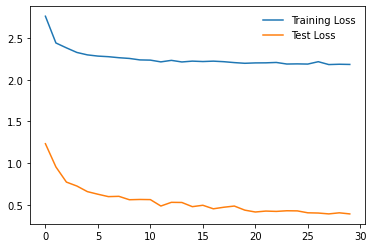

In [7]:
# Plotting the graph
plt.plot(train_losses, label= "Training Loss")
plt.plot(test_losses, label= "Test Loss")
plt.legend(frameon= False)
plt.show()